# Mocap Pose Estimation For Baseball BioMechanics

In [28]:
import cv2
import mediapipe as mp
import time
import numpy as np
import matplotlib.pyplot as plt

In [29]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

## Mocap Over Video

In [30]:
pTime = 0

mocap = []

cap = cv2.VideoCapture('test_pitch - Made with Clipchamp_1683297167868.mp4')
success, img = cap.read()
while success == True:
    
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img,results.pose_landmarks,mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h,w,c = img.shape
            
            cx,cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(img,(cx,cy),5,(255,0,255),cv2.FILLED)

    
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(img,str(int(fps)),(70,50),cv2.FONT_HERSHEY_PLAIN,3,(255,0,0),3)
    cv2.imshow("Image",img)
    cv2.waitKey(10)
    mocap.append(results.pose_landmarks)
    success, img = cap.read()
cv2.destroyAllWindows()

## Mocap over Blank Screen

In [5]:
pTime = 0

mocap = []

cap = cv2.VideoCapture('test_pitch - Made with Clipchamp_1683297167868.mp4')
success, img = cap.read()

h,w,c = img.shape
blank_img = np.zeros((h,w,c), np.uint8)

while success == True:
    
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    
    if results.pose_landmarks:
        mpDraw.draw_landmarks(blank_img,results.pose_landmarks,mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            
            cx,cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(blank_img,(cx,cy),5,(255,0,255),cv2.FILLED)
            

    
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(img,str(int(fps)),(70,50),cv2.FONT_HERSHEY_PLAIN,3,(255,0,0),3)
    cv2.imshow("Image",blank_img)
    cv2.waitKey(1)
    blank_img = np.zeros((h,w,c), np.uint8)
    mocap.append(results.pose_landmarks)
    success, img = cap.read()
cv2.destroyAllWindows()

### Now Let's Look At The Data

Text(0.5, 1.0, 'Side View of Pitching Motion')

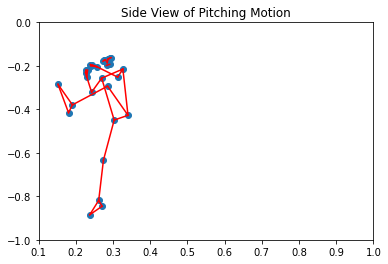

In [49]:
x = []
y = []
z = []
frame = 70
for i in range(33):
    x.append(mocap[frame].landmark[i].x)
    y.append(mocap[frame].landmark[i].y * -1) # Flipping y to negative so the figure appears "right-side-up"
plt.scatter(x,y)

for i in range(len(list(mpPose.POSE_CONNECTIONS))):
    point = list(mpPose.POSE_CONNECTIONS)[i]
    plt.plot([x[point[0]],x[point[1]]],[y[point[0]],y[point[1]]], c = 'r')
   
plt.ylim(-1,0)
plt.xlim(0.1,1)
plt.title("Side View of Pitching Motion")

<IPython.core.display.Javascript object>


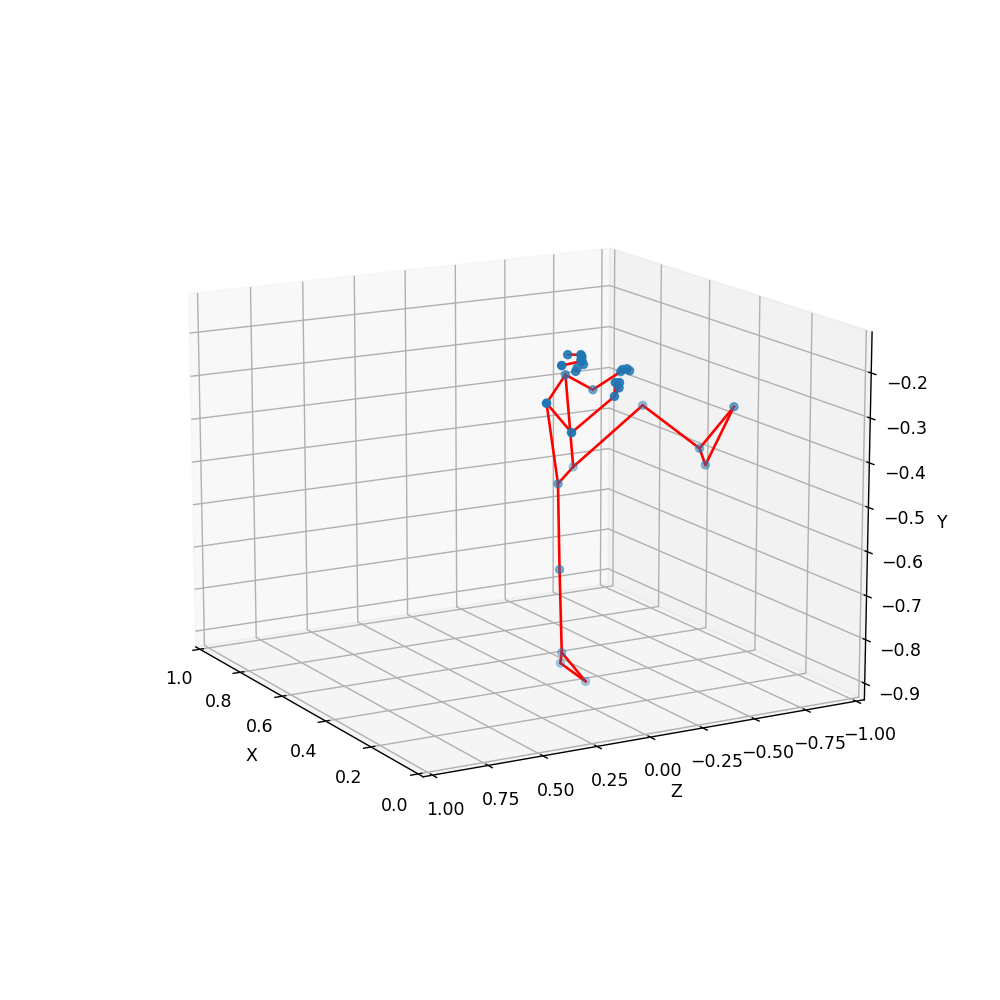

(-1.0, 1.0)

In [81]:
%matplotlib notebook

fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot(projection='3d')

x = []
y = []
z = []
frame = 70
for i in range(33):
    x.append(mocap[frame].landmark[i].x)
    y.append(mocap[frame].landmark[i].y * -1) # Flipping y to negative so the figure appears "right-side-up"
    z.append(mocap[frame].landmark[i].z)
ax.scatter(x,z,y)


for i in range(len(list(mpPose.POSE_CONNECTIONS))):
    point = list(mpPose.POSE_CONNECTIONS)[i]
    ax.plot([x[point[0]],x[point[1]]],
            [z[point[0]],z[point[1]]],
            [y[point[0]],y[point[1]]],c = 'r')

ax.set_xlabel('X ')
ax.set_ylabel('Z ')
ax.set_zlabel('Y ')
ax.set_xlim(0,1)
ax.set_ylim(-1,1)



In [77]:
min(x)

0.3727291524410248